---
title: "画像グリッド描画サンプル"
date: 2024-05-04
categories: [notebook,image]
---
複数枚の画像をグリッド描画するサンプルコードです。  
`torchvision` の `make_grid` を使って描画します。 [make_grid](https://pytorch.org/vision/0.17/generated/torchvision.utils.make_grid.html)

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.utils import make_grid
import torch

In [2]:
class CFG:
    H=32
    W=64
    row=3

In [3]:
def get_tranform():
    """画像をアスペクト比を変えずに CFG.H * CFG.W サイズに変換する"""
    t = A.Compose([
        A.LongestMaxSize(max_size=max(CFG.H,CFG.W)),
        A.PadIfNeeded(min_height=CFG.H, min_width=CFG.W, border_mode=0, mask_value=0),
        ToTensorV2(),
    ])
    return t

### 画像の用意

数枚ランダムに単色画像を作成する

In [4]:
def create_img(color,size):
    """単色画像の作成"""
    return np.array(color,dtype=np.uint8)*np.ones((*size,3), dtype=np.uint8)

In [5]:
images= [create_img([random.randint(0,255) for _ in range(3)],(20,50)) for _ in range(20)]

### grid の作成

In [6]:
t=get_tranform()
images=[t(image=img)['image'] for img in images]

In [7]:
tmp=torch.stack(images)

In [17]:
res=make_grid(tmp,3,padding=2)

In [18]:
# channel を一番最後に
grid_image=res.permute(1,2,0).numpy()

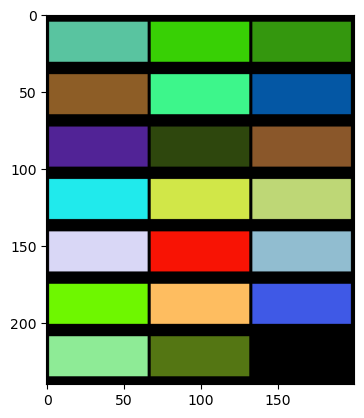

In [19]:
plt.imshow(grid_image)

### save

In [11]:
from PIL import Image

In [12]:
image=Image.fromarray(grid_image)

In [13]:
image.save("test.jpg")